In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 3: Modelo Lineal

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [3]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

Realice el preprocesamiento que considere adecuado para que las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__, __Embarked__ y __Survived__ puedan ser utilizadas por un modelo lineal.

- Pclass la dejaremos igual porque son categorías que siguen un orden.
- Sex le aplicamos OHEncoder
- SibSp le reducimos la asimetría con raíz cuadrada.
- Parch le reducimos la asimetría con raíz cuadrada.
- Fare le reducimos la asimetría con raíz cuadrada.
- Embarked le aplicamos OHEncoder

In [4]:
corr = df.corr()
corr.style.background_gradient(cmap = 'YlOrRd')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [5]:
column = df.SibSp

In [6]:
print(set(column))

{0, 1, 2, 3, 4, 5, 8}


In [7]:
def calc_skewness(x):
    return (((x - x.mean()) / (x.var() ** (1/2))) ** 3).mean()

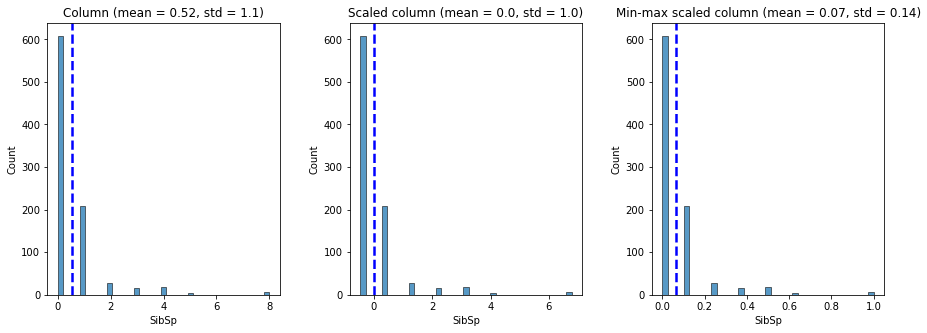

In [8]:
__fig__, __axs__ = plt.subplots(ncols=3, figsize=(15, 5))
__fig__.subplots_adjust(hspace=0.1, wspace=0.3)

__axs__[0].set(title="Column (mean = {}, std = {})".format(round(column.mean(), 2), round((column.var())**(1/2), 2)))
_ = sns.histplot(x=column, ax=__axs__[0])
_.axvline(x=column.mean(),
            color='blue',
            ls='--', 
            lw=2.5)

scaled_column = (column - column.mean()) / (column.var())**(1/2)
__axs__[1].set(title="Scaled column (mean = {}, std = {})".format(round(scaled_column.mean(), 2), round((scaled_column.var())**(1/2), 2)))
_ = sns.histplot(x=scaled_column, ax=__axs__[1])
_.axvline(x=scaled_column.mean(),
            color='blue',
            ls='--', 
            lw=2.5)

minmax_scaled_column = (column - column.min()) / (column.max() - column.min())
__axs__[2].set(title="Min-max scaled column (mean = {}, std = {})".format(round(minmax_scaled_column.mean(), 2), round((minmax_scaled_column.var())**(1/2), 2)))
_ = sns.histplot(x=minmax_scaled_column, ax=__axs__[2])
_.axvline(x=minmax_scaled_column.mean(),
            color='blue',
            ls='--', 
            lw=2.5)

In [9]:
skewness = calc_skewness(column)
skewness

3.682918775041469

In [10]:
column_array = np.array(column.fillna(column.mean()))
column_array[column_array == 0] = 0
#col_function = np.log(column_array)
col_function = (column_array) ** (1/2)
#col_function = (column_array) ** (-1)

In [11]:
improved_skewness = calc_skewness(col_function)
improved_skewness

1.4341069481300395

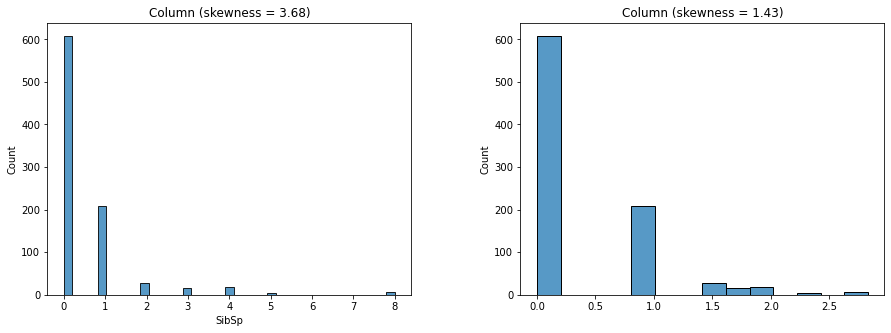

In [12]:
__fig__, __axs__ = plt.subplots(ncols=2, figsize=(15, 5))
__fig__.subplots_adjust(hspace=0.1, wspace=0.3)
__axs__[0].set(title="Column (skewness = {})".format(round(skewness, 2)))
_ = sns.histplot(x=column, ax=__axs__[0])

__axs__[1].set(title="Column (skewness = {})".format(round(improved_skewness, 2)))
_ = sns.histplot(x=col_function, ax=__axs__[1])

#### OneHotEncoder

In [13]:
def ohe(df, columns):
    for col in columns:
        print(col)
        col_encoded = pd.get_dummies(pd.Series(df[col]))
        print(col_encoded.head(3))
        df[['{}_'.format(col) + str(c) for c in list(col_encoded.columns.values)]] = col_encoded
        df = df.drop(columns = col)
        
    return df

In [14]:
pp_df = ohe(df, ['Sex', 'Embarked', 'Pclass'])

Sex
   female  male
0       0     1
1       1     0
2       1     0
Embarked
   C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
Pclass
   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1


#### Resolver skewness

In [15]:
column = df.SibSp
column_array = np.array(column.fillna(column.mean()))
column_array[column_array == 0] = 0
col_function = (column_array) ** (1/2)
pp_df['SibSp'] = col_function

In [16]:
column = df.Parch
column_array = np.array(column.fillna(column.mean()))
column_array[column_array == 0] = 0
col_function = (column_array) ** (1/2)
pp_df['Parch'] = col_function

In [17]:
column = df.Fare
column_array = np.array(column.fillna(column.mean()))
column_array[column_array == 0] = 0
col_function = (column_array) ** (1/2)
pp_df['Fare'] = col_function

In [18]:
pp_df = pp_df.drop(columns = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin'])

In [19]:
pp_df.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1.0,0.0,2.692582,0,1,0,0,1,0,0,1
1,1,1.0,0.0,8.442944,1,0,1,0,0,1,0,0
2,1,0.0,0.0,2.815138,1,0,0,0,1,0,0,1
3,1,1.0,0.0,7.286975,1,0,0,0,1,1,0,0
4,0,0.0,0.0,2.837252,0,1,0,0,1,0,0,1


#### Normalización

In [20]:
def scale_data(data, cols):
    for c in cols:
        column = data[c]
        sc_column = scale_column(column)
        data[c] = sc_column
    return data

In [21]:
def scale_column(x):
    return (x - x.mean()) / x.std()

In [22]:
pp_df = scale_data(pp_df, ['SibSp', 'Parch', 'Fare'])

In [23]:
pp_df

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1.003846,-0.539444,-0.732705,0,1,0,0,1,0,0,1
1,1,1.003846,-0.539444,1.219137,1,0,1,0,0,1,0,0
2,1,-0.629184,-0.539444,-0.691106,1,0,0,0,1,0,0,1
3,1,1.003846,-0.539444,0.826767,1,0,0,0,1,1,0,0
4,0,-0.629184,-0.539444,-0.683600,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.629184,-0.539444,-0.422817,0,1,0,0,1,0,1,0
887,1,-0.629184,-0.539444,0.212485,1,0,0,0,1,1,0,0
888,0,1.003846,2.060647,-0.002953,1,0,0,0,1,0,0,1
889,1,-0.629184,-0.539444,0.212485,0,1,1,0,0,1,0,0


## Asignación 2 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir __Survived__ utilizando el algoritmo _pocket_. Imprima el error obtenido.

In [24]:
def __random_fn_def__():
    def __random_fn__(shape):
        return np.zeros(shape)
    
    return __random_fn__
    
__random_fn__ = __random_fn_def__()

In [25]:
def train_pla(
    data,
    target,
    prev_model,
    max_iters=1000
) -> np.array: 
    """
    Descripción:
    Esta funcion ejecuta una variante del algoritmo PLA para clasificar datos linealmente separables.
    
    Entradas:
    - data: Indica las características utilizadas para la clasificación.
    - target: Indíca las etiquetas que se esperan obtener despues de una correcta clasificación.
    - max_iters: Indica el número máximo de iteraciones del algoritmo. Si el algoritmo no converge
                antes del número máximo de iteraciones, se detiene y devuelve los parámetros 
                calculados hasta el momento.
            
    Salidas:
    - Un arreglo de numpy indicando los parámetros calculados
    """
        
    model = __random_fn__((data.shape[1],))
    
    # CÓDIGO AQUÍ
    
    labels = np.zeros((data.shape[0]))
    for j in range(data.shape[0]):
        if prev_model @ data[j] >= 0:
            labels[j] = 1
        else: 
            labels[j] = -1
    misclassified_points_indexes = list()
    for l in range(data.shape[0]):
        if labels[l] != target[l]:
            misclassified_points_indexes.append(l)
    #print(len(misclassified_points_indexes))
    if len(misclassified_points_indexes) != 0:
        msclf_index = np.random.choice(misclassified_points_indexes, 1)
        #print(msclf_index)
        #print(target[msclf_index].T @ data[msclf_index])
        model = prev_model + (target[msclf_index].T @ data[msclf_index])
    
    return np.ravel(model)

In [26]:
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

In [27]:
def match_results(a, b):
    if a != b:
        return 1
    else:
        return 0

In [28]:
def E_in_pocket(X, y, w):
    acum_sum = 0
    for i in range(X.shape[0]):
        acum_sum += match_results(sign(w.T @ X[i]), y[i])
    
    return acum_sum / X.shape[0]

In [29]:
def pocket(X, y, T):
    w = list()
    e_ins = list()
    w_0 = __random_fn__((X.shape[1]))
    w.append(w_0)
    w_opt = w_0
    e_in_0 = E_in_pocket(X, y, w_0)
    e_ins.append(e_in_0)
    
    for i in range(T):
        w_next = train_pla(X, y, w[-1])
        w.append(w_next)
        print("Itera {}".format(i))
        #print("w[{}]".format(i))
        print(X.shape)
        print(w_next.shape)
        e_in = E_in_pocket(X, y, w_next)
        print(e_in)
        
        e_ins.append(e_in)
        e_in_best = E_in_pocket(X, y, w_opt)
        e_in_next = e_ins[-1]
        if e_in_next < e_in_best:
            w_opt = w_next
    
    return w_opt

#### Ajustes en las columnas (reordenar)

In [30]:
pp_df_aux = pp_df

In [31]:
pp_df_aux['Survived'] = pp_df_aux['Survived'].replace(0, -1)

In [32]:
pp_df_aux

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,-1,1.003846,-0.539444,-0.732705,0,1,0,0,1,0,0,1
1,1,1.003846,-0.539444,1.219137,1,0,1,0,0,1,0,0
2,1,-0.629184,-0.539444,-0.691106,1,0,0,0,1,0,0,1
3,1,1.003846,-0.539444,0.826767,1,0,0,0,1,1,0,0
4,-1,-0.629184,-0.539444,-0.683600,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-1,-0.629184,-0.539444,-0.422817,0,1,0,0,1,0,1,0
887,1,-0.629184,-0.539444,0.212485,1,0,0,0,1,1,0,0
888,-1,1.003846,2.060647,-0.002953,1,0,0,0,1,0,0,1
889,1,-0.629184,-0.539444,0.212485,0,1,1,0,0,1,0,0


In [ ]:
#pp_df_aux_cols = list(pp_df_aux.columns.values)
#pp_df_aux_cols = [pp_df_aux_cols[-1]] + pp_df_aux_cols[0:-1]
#pp_df_aux = pp_df_aux[pp_df_aux_cols]

In [33]:
X = np.array(pp_df_aux.drop(columns = ['Survived']))
X = np.insert(X, 0, 1, axis = 1)
y = np.array(pp_df_aux['Survived'])

In [34]:
X.shape

(891, 12)

In [35]:
w_opt = pocket(X, y, 1000)

Itera 0
(891, 12)
(12,)
0.3782267115600449
Itera 1
(891, 12)
(12,)
0.3838383838383838
Itera 2
(891, 12)
(12,)
0.3333333333333333
Itera 3
(891, 12)
(12,)
0.31425364758698093
Itera 4
(891, 12)
(12,)
0.36363636363636365
Itera 5
(891, 12)
(12,)
0.30190796857463525
Itera 6
(891, 12)
(12,)
0.3771043771043771
Itera 7
(891, 12)
(12,)
0.3164983164983165
Itera 8
(891, 12)
(12,)
0.5061728395061729
Itera 9
(891, 12)
(12,)
0.3164983164983165
Itera 10
(891, 12)
(12,)
0.32098765432098764
Itera 11
(891, 12)
(12,)
0.28619528619528617
Itera 12
(891, 12)
(12,)
0.2716049382716049
Itera 13
(891, 12)
(12,)
0.31425364758698093
Itera 14
(891, 12)
(12,)
0.29854096520763185
Itera 15
(891, 12)
(12,)
0.25813692480359146
Itera 16
(891, 12)
(12,)
0.26936026936026936
Itera 17
(891, 12)
(12,)
0.2962962962962963
Itera 18
(891, 12)
(12,)
0.3254769921436588
Itera 19
(891, 12)
(12,)
0.30078563411896747
Itera 20
(891, 12)
(12,)
0.30864197530864196
Itera 21
(891, 12)
(12,)
0.388327721661055
Itera 22
(891, 12)
(12,)
0.61391

0.25925925925925924
Itera 184
(891, 12)
(12,)
0.2356902356902357
Itera 185
(891, 12)
(12,)
0.3894500561167228
Itera 186
(891, 12)
(12,)
0.2356902356902357
Itera 187
(891, 12)
(12,)
0.24579124579124578
Itera 188
(891, 12)
(12,)
0.24354657687991021
Itera 189
(891, 12)
(12,)
0.2143658810325477
Itera 190
(891, 12)
(12,)
0.24915824915824916
Itera 191
(891, 12)
(12,)
0.26374859708193044
Itera 192
(891, 12)
(12,)
0.3254769921436588
Itera 193
(891, 12)
(12,)
0.3277216610549944
Itera 194
(891, 12)
(12,)
0.23905723905723905
Itera 195
(891, 12)
(12,)
0.2671156004489338
Itera 196
(891, 12)
(12,)
0.287317620650954
Itera 197
(891, 12)
(12,)
0.2547699214365881
Itera 198
(891, 12)
(12,)
0.2570145903479237
Itera 199
(891, 12)
(12,)
0.33108866442199775
Itera 200
(891, 12)
(12,)
0.2996632996632997
Itera 201
(891, 12)
(12,)
0.2996632996632997
Itera 202
(891, 12)
(12,)
0.26262626262626265
Itera 203
(891, 12)
(12,)
0.2255892255892256
Itera 204
(891, 12)
(12,)
0.22783389450056116
Itera 205
(891, 12)
(12,)
0.

Itera 368
(891, 12)
(12,)
0.2772166105499439
Itera 369
(891, 12)
(12,)
0.23007856341189675
Itera 370
(891, 12)
(12,)
0.30190796857463525
Itera 371
(891, 12)
(12,)
0.26936026936026936
Itera 372
(891, 12)
(12,)
0.3041526374859708
Itera 373
(891, 12)
(12,)
0.55331088664422
Itera 374
(891, 12)
(12,)
0.30190796857463525
Itera 375
(891, 12)
(12,)
0.28058361391694725
Itera 376
(891, 12)
(12,)
0.2558922558922559
Itera 377
(891, 12)
(12,)
0.24017957351290684
Itera 378
(891, 12)
(12,)
0.3479236812570146
Itera 379
(891, 12)
(12,)
0.30864197530864196
Itera 380
(891, 12)
(12,)
0.31313131313131315
Itera 381
(891, 12)
(12,)
0.32435465768799104
Itera 382
(891, 12)
(12,)
0.2648709315375982
Itera 383
(891, 12)
(12,)
0.35914702581369246
Itera 384
(891, 12)
(12,)
0.27497194163860833
Itera 385
(891, 12)
(12,)
0.32098765432098764
Itera 386
(891, 12)
(12,)
0.2536475869809203
Itera 387
(891, 12)
(12,)
0.2772166105499439
Itera 388
(891, 12)
(12,)
0.2255892255892256
Itera 389
(891, 12)
(12,)
0.3288439955106622


0.3153759820426487
Itera 559
(891, 12)
(12,)
0.24242424242424243
Itera 560
(891, 12)
(12,)
0.24130190796857465
Itera 561
(891, 12)
(12,)
0.3052749719416386
Itera 562
(891, 12)
(12,)
0.2558922558922559
Itera 563
(891, 12)
(12,)
0.24803591470258138
Itera 564
(891, 12)
(12,)
0.5510662177328844
Itera 565
(891, 12)
(12,)
0.3569023569023569
Itera 566
(891, 12)
(12,)
0.2558922558922559
Itera 567
(891, 12)
(12,)
0.2716049382716049
Itera 568
(891, 12)
(12,)
0.27497194163860833
Itera 569
(891, 12)
(12,)
0.3254769921436588
Itera 570
(891, 12)
(12,)
0.24915824915824916
Itera 571
(891, 12)
(12,)
0.2962962962962963
Itera 572
(891, 12)
(12,)
0.2615039281705948
Itera 573
(891, 12)
(12,)
0.2671156004489338
Itera 574
(891, 12)
(12,)
0.244668911335578
Itera 575
(891, 12)
(12,)
0.3108866442199775
Itera 576
(891, 12)
(12,)
0.2895622895622896
Itera 577
(891, 12)
(12,)
0.2716049382716049
Itera 578
(891, 12)
(12,)
0.29854096520763185
Itera 579
(891, 12)
(12,)
0.5016835016835017
Itera 580
(891, 12)
(12,)
0.277

Itera 745
(891, 12)
(12,)
0.2536475869809203
Itera 746
(891, 12)
(12,)
0.24130190796857465
Itera 747
(891, 12)
(12,)
0.5780022446689114
Itera 748
(891, 12)
(12,)
0.24242424242424243
Itera 749
(891, 12)
(12,)
0.5465768799102132
Itera 750
(891, 12)
(12,)
0.2558922558922559
Itera 751
(891, 12)
(12,)
0.2727272727272727
Itera 752
(891, 12)
(12,)
0.31874298540965207
Itera 753
(891, 12)
(12,)
0.36475869809203143
Itera 754
(891, 12)
(12,)
0.6161616161616161
Itera 755
(891, 12)
(12,)
0.3894500561167228
Itera 756
(891, 12)
(12,)
0.55331088664422
Itera 757
(891, 12)
(12,)
0.39169472502805835
Itera 758
(891, 12)
(12,)
0.33108866442199775
Itera 759
(891, 12)
(12,)
0.2558922558922559
Itera 760
(891, 12)
(12,)
0.3344556677890011
Itera 761
(891, 12)
(12,)
0.3221099887766554
Itera 762
(891, 12)
(12,)
0.3501683501683502
Itera 763
(891, 12)
(12,)
0.6307519640852974
Itera 764
(891, 12)
(12,)
0.3501683501683502
Itera 765
(891, 12)
(12,)
0.25813692480359146
Itera 766
(891, 12)
(12,)
0.2884399551066218
Itera

0.2334455667789001
Itera 936
(891, 12)
(12,)
0.26262626262626265
Itera 937
(891, 12)
(12,)
0.24803591470258138
Itera 938
(891, 12)
(12,)
0.22783389450056116
Itera 939
(891, 12)
(12,)
0.26374859708193044
Itera 940
(891, 12)
(12,)
0.23905723905723905
Itera 941
(891, 12)
(12,)
0.24242424242424243
Itera 942
(891, 12)
(12,)
0.24803591470258138
Itera 943
(891, 12)
(12,)
0.22783389450056116
Itera 944
(891, 12)
(12,)
0.30303030303030304
Itera 945
(891, 12)
(12,)
0.3367003367003367
Itera 946
(891, 12)
(12,)
0.29068462401795736
Itera 947
(891, 12)
(12,)
0.2345679012345679
Itera 948
(891, 12)
(12,)
0.26823793490460157
Itera 949
(891, 12)
(12,)
0.2536475869809203
Itera 950
(891, 12)
(12,)
0.2962962962962963
Itera 951
(891, 12)
(12,)
0.36924803591470257
Itera 952
(891, 12)
(12,)
0.26374859708193044
Itera 953
(891, 12)
(12,)
0.2884399551066218
Itera 954
(891, 12)
(12,)
0.3658810325476992
Itera 955
(891, 12)
(12,)
0.3490460157126824
Itera 956
(891, 12)
(12,)
0.5274971941638609
Itera 957
(891, 12)
(12

In [36]:
w_opt

array([ 0.        , -1.03289394,  0.19733493,  0.42208554,  3.        ,
       -3.        ,  1.        ,  0.        , -1.        ,  0.        ,
        1.        , -1.        ])

In [37]:
E_in_pocket(X, y, w_opt)

0.1919191919191919

## Asignación 3 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Cabin__ y __Embarked__, entrene una regresión lineal para predecir __Fare__ utilizando el algoritmo de Ordinary Leasts Squares (OLS). Imprima el valor del error cuadrático medio (MSE).

In [38]:
pp_df_aux

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,-1,1.003846,-0.539444,-0.732705,0,1,0,0,1,0,0,1
1,1,1.003846,-0.539444,1.219137,1,0,1,0,0,1,0,0
2,1,-0.629184,-0.539444,-0.691106,1,0,0,0,1,0,0,1
3,1,1.003846,-0.539444,0.826767,1,0,0,0,1,1,0,0
4,-1,-0.629184,-0.539444,-0.683600,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-1,-0.629184,-0.539444,-0.422817,0,1,0,0,1,0,1,0
887,1,-0.629184,-0.539444,0.212485,1,0,0,0,1,1,0,0
888,-1,1.003846,2.060647,-0.002953,1,0,0,0,1,0,0,1
889,1,-0.629184,-0.539444,0.212485,0,1,1,0,0,1,0,0


In [52]:
def ols(X, Y):
    beta_hat = np.matmul(np.linalg.pinv(X), Y)
    return beta_hat

In [53]:
X = np.array(pp_df_aux.drop(columns = ['Survived', 'Fare']))
X = np.insert(X, 0, 1, axis = 1)
y = np.array(pp_df_aux['Fare'])

In [54]:
X

array([[ 1.        ,  1.00384576, -0.53944444, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.00384576, -0.53944444, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.62918408, -0.53944444, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        ,  1.00384576,  2.06064749, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , -0.62918408, -0.53944444, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.62918408, -0.53944444, ...,  0.        ,
         0.        ,  1.        ]])

In [55]:
X.shape

(891, 11)

In [56]:
w_lin = ols(X, y)
w_lin

array([ 0.31905176,  0.20351645,  0.2073766 ,  0.22722178,  0.09182997,
       -0.20020128, -0.40438923, -0.43070579,  1.08294695, -0.24330183,
       -0.52059336])

In [59]:
def mse(X, y, w):
    return (((X @ w.T) - y) ** 2).mean()

In [60]:
mse(X, y, w_lin)

0.3663338220243986

In [61]:
import statsmodels.api as sm
result = sm.OLS(y, X, hasconst = True).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     190.4
Date:                Fri, 24 Mar 2023   Prob (F-statistic):          2.83e-186
Time:                        03:47:52   Log-Likelihood:                -816.90
No. Observations:                 891   AIC:                             1652.
Df Residuals:                     882   BIC:                             1695.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3191      0.236      1.353      0.1

In [62]:
result.params

array([ 0.31905176,  0.20351645,  0.2073766 ,  0.22722178,  0.09182997,
       -0.20020128, -0.40438923, -0.43070579,  1.08294695, -0.24330183,
       -0.52059336])

In [63]:
X @ result.params

array([-0.44798645,  1.52145019, -0.64494307,  1.29094567, -0.78033489,
       -0.75401833,  0.82320543,  0.17658021, -0.10574484,  0.1952014 ,
        0.06867608,  0.95859724, -0.78033489,  0.40456081, -0.64494307,
       -0.36765154,  0.29194926, -0.50304336, -0.31259464, -0.41443856,
       -0.50304336, -0.50304336, -0.61862652,  0.82320543,  0.31197202,
        0.53995262, -0.54983038,  1.93804803, -0.61862652, -0.78033489,
        1.05370994,  1.52145019, -0.61862652, -0.50304336,  1.38605837,
        1.15555386, -0.54983038, -0.78033489, -0.17493141, -0.08209013,
       -0.31259464, -0.03530311, -0.54983038,  0.73439963, -0.61862652,
       -0.78033489, -0.4216699 , -0.61862652, -0.07981871, -0.31259464,
        0.26563271, -0.78033489,  1.52145019, -0.03530311,  1.43498067,
        0.82320543, -0.36765154, -0.54983038,  0.50389512,  0.50201703,
       -0.54983038,  1.38930303,  1.15555386,  0.33450772,  1.05370994,
        0.16378878, -0.36765154, -0.78033489,  0.55895202, -0.31

In [64]:
X @ w_lin.T

array([-0.44798645,  1.52145019, -0.64494307,  1.29094567, -0.78033489,
       -0.75401833,  0.82320543,  0.17658021, -0.10574484,  0.1952014 ,
        0.06867608,  0.95859724, -0.78033489,  0.40456081, -0.64494307,
       -0.36765154,  0.29194926, -0.50304336, -0.31259464, -0.41443856,
       -0.50304336, -0.50304336, -0.61862652,  0.82320543,  0.31197202,
        0.53995262, -0.54983038,  1.93804803, -0.61862652, -0.78033489,
        1.05370994,  1.52145019, -0.61862652, -0.50304336,  1.38605837,
        1.15555386, -0.54983038, -0.78033489, -0.17493141, -0.08209013,
       -0.31259464, -0.03530311, -0.54983038,  0.73439963, -0.61862652,
       -0.78033489, -0.4216699 , -0.61862652, -0.07981871, -0.31259464,
        0.26563271, -0.78033489,  1.52145019, -0.03530311,  1.43498067,
        0.82320543, -0.36765154, -0.54983038,  0.50389512,  0.50201703,
       -0.54983038,  1.38930303,  1.15555386,  0.33450772,  1.05370994,
        0.16378878, -0.36765154, -0.78033489,  0.55895202, -0.31

## Asignación 4 &#x1F921;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir la probabilidad de supervivencia __Survived__ utilizando el algoritmo de gradiente descendente estocástico y la entropía cruzada como función de error. Imprima el arror en cada iteración del gradiente.

In [67]:
X = np.array(pp_df_aux.drop(columns = ['Survived']))
X = np.insert(X, 0, 1, axis = 1)
y = np.array(pp_df_aux['Survived'])

In [68]:
X.shape

(891, 12)

In [69]:
def E_in_log_reg_sgd(X, y, w):
    return np.mean(np.log(1 + np.exp(X @ w * y)))

In [70]:
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

In [124]:
def cross_entropy(X, y, w):
    res = list()
    for i in range(X.shape[0]):
        res.append((match_results(y[i], 1) * np.log(1 / sigmoid(X[i] @ w))) + (match_results(y[i], -1) * np.log(1 / (1 - sigmoid(X[i] @ w)))))
    
    return np.sum(res)

In [139]:
def cross_entropy_f(X, y, w, N):
    res = list()
    for i in range(X.shape[0]):
        res.append(y[i] * X[i] / (1 + np.exp(y[i] * X[i] @ w)))
    
    return (1 / N) * np.sum(res)

In [128]:
def FF_CrossEntropy(X, y, w):
    z = - np.dot(X, w)
    p = 1/(1+np.exp(z))

    crossEntropy = (-y + p)/(p*(1-p)) 

    return crossEntropy

In [120]:
def f_grad(X, y, w):
    return (-y * X) * sigmoid(-y * w.T @ X)

In [137]:
def logistic_reg_sgd(X, y, lr, T = 100, badge_size = 1):
    N = X.shape[0]
    acum_sum = 0
    w_0 = __random_fn__((X.shape[1]))
    print(w_0)
    w = list()
    w.append(w_0)
    
    for i in range(T):
        print("Epoch {}".format(i))
        indexes = [ind for ind in range(N)]
        
        badge_indexes = np.random.choice(indexes, badge_size, False)
        X_badges = X[badge_indexes]
        y_badges = y[badge_indexes]
        print(X_badges)
        print(y_badges)
        grad_desc_w = cross_entropy_f(X_badges, y_badges, w[-1], N)
        
        w_next = w[-1] - lr * grad_desc_w
        #print(w_next)
        print(np.linalg.norm(w_next))
        w.append(w_next)
        e_in = E_in_log_reg_sgd(X, y, w_next)
        #print(e_in)
        cee = cross_entropy_f(X, y, w_next, N)
        print(cee)
    return w[-1]

In [144]:
w_log_sgd = logistic_reg_sgd(X, y, 0.001, 1000)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Epoch 0
[[ 1.         -0.62918408 -0.53944444 -0.7342824   0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[1]
4.076615977000042e-06
-0.23358105707243615
Epoch 1
[[1.         1.68026887 1.2990982  0.47308964 1.         0.
  0.         0.         1.         0.         1.         0.        ]]
[1]
1.856381042739792e-05
-0.2335589086925109
Epoch 2
[[ 1.         -0.62918408 -0.53944444 -0.6911064   0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
1.4403286745923351e-05
-0.23356526940365396
Epoch 3
[[ 1.         -0.62918408  2.06064749  0.09241169  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[1]
2.514149349408584e-05
-0.23354885256852945
Epoch 4
[[ 1.         -0.62918408 -0.53944444  1.37408514  1.          0.
   1.          0.          0.          1.          0.          0.        ]]
[1]
3.3316774859772074e-05
-0.23353

-0.2336956488292785
Epoch 65
[[ 1.         -0.62918408 -0.53944444 -0.17540517  0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[-1]
7.604071765716903e-05
-0.23370354242643895
Epoch 66
[[ 1.         -0.62918408 -0.53944444 -0.29957801  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[1]
7.111919906741419e-05
-0.23369601828756573
Epoch 67
[[ 1.          1.00384576 -0.53944444  0.08411065  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[-1]
7.996164763511385e-05
-0.23370953684078627
Epoch 68
[[ 1.         -0.62918408  1.2990982  -0.35618095  1.          0.
   1.          0.          0.          0.          0.          1.        ]]
[-1]
8.834770487711065e-05
-0.2337223576516853
Epoch 69
[[1.         1.00384576 3.13764084 0.14623493 1.         0.
  0.         0.         1.         0.         0.         1.        ]]
[-1]
0.0001044602434123675
-0.23374699089746664

-0.23396677689713688
Epoch 111
[[ 1.         -0.62918408 -0.53944444 -0.7342824   0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[-1]
0.0002522985891119718
-0.23397300979596922
Epoch 112
[[ 1.          1.68026887 -0.53944444 -0.37171537  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0002615710624963719
-0.2339871857808197
Epoch 113
[[ 1.         -0.62918408 -0.53944444 -0.78460317  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0002655501653594309
-0.23399326913089913
Epoch 114
[[ 1.         -0.62918408 -0.53944444 -0.96672834  0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[-1]
0.00026917517937092715
-0.2339988111412434
Epoch 115
[[ 1.         -0.62918408 -0.53944444 -0.60045517  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0002735123233949592
-

-0.23415991246108267
Epoch 166
[[ 1.         -0.62918408 -0.53944444 -0.6911064   0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0003787121505848198
-0.2341662739437308
Epoch 167
[[ 1.         -0.62918408 -0.53944444  0.90463049  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.00038597619852589896
-0.2341773793975364
Epoch 168
[[ 1.         -0.62918408 -0.53944444  0.09365343  0.          1.
   0.          0.          1.          1.          0.          0.        ]]
[1]
0.0003802910512926589
-0.23416868780567898
Epoch 169
[[1.         2.19930658 2.06064749 0.14623493 0.         1.
  0.         0.         1.         0.         0.         1.        ]]
[-1]
0.00039663972095239436
-0.2341936820507959
Epoch 170
[[ 1.         -0.62918408 -0.53944444 -0.70298432  0.          1.
   0.          1.          0.          0.          0.          1.        ]]
[-1]
0.00040077768267469363
-0.2342000082

-0.23414818381182764
Epoch 220
[[ 1.         -0.62918408 -0.53944444 -0.70783156  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.00037100794230756885
-0.2341544955619884
Epoch 221
[[ 1.          1.00384576 -0.53944444  1.32659295  0.          1.
   1.          0.          0.          1.          0.          0.        ]]
[1]
0.00035975408617823853
-0.23413729039180375
Epoch 222
[[1.         2.19930658 2.06064749 3.85797529 0.         1.
  0.         0.         1.         1.         0.         0.        ]]
[-1]
0.0003833254400244515
-0.23417332685324274
Epoch 223
[[1.         3.02238165 2.06064749 0.67788768 1.         0.
  0.         0.         1.         0.         0.         1.        ]]
[-1]
0.00040231032696191307
-0.23420235141155837
Epoch 224
[[ 1.         -0.62918408 -0.53944444  1.51023015  1.          0.
   0.          0.          1.          1.          0.          0.        ]]
[1]
0.0003938726403490665
-0.23418945167047076
Epo

-0.23432173887860994
Epoch 272
[[ 1.         -0.62918408 -0.53944444 -0.70171543  0.          1.
   0.          1.          0.          0.          0.          1.        ]]
[1]
0.00047626204435521284
-0.23431541059660116
Epoch 273
[[ 1.         -0.62918408 -0.53944444 -1.64664738  0.          1.
   0.          0.          1.          1.          0.          0.        ]]
[-1]
0.0004785652648471715
-0.2343189318160058
Epoch 274
[[ 1.         -0.62918408 -0.53944444 -0.32766755  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.000483433157542121
-0.2343263739685113
Epoch 275
[[ 1.          1.00384576  2.06064749 -0.1070059   0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0004969646636382401
-0.2343470612632719
Epoch 276
[[ 1.         -0.62918408 -0.53944444 -0.7342824   0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[1]
0.0004928886608886644
-0.23

-0.23428939191673495
Epoch 325
[[ 1.         -0.62918408 -0.53944444 -0.70019258  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[1]
0.00045510099410635475
-0.23428305906886476
Epoch 326
[[ 1.          1.00384576 -0.53944444 -0.28469282  1.          0.
   0.          0.          1.          0.          0.          1.        ]]
[1]
0.0004469781211102017
-0.23427064062310315
Epoch 327
[[ 1.         -0.62918408 -0.53944444  0.24321651  0.          1.
   1.          0.          0.          1.          0.          0.        ]]
[1]
0.0004410024911619121
-0.23426150493466708
Epoch 328
[[ 1.         -0.62918408 -0.53944444 -0.42281664  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[1]
0.000436321122165926
-0.23425434794382508
Epoch 329
[[ 1.          1.00384576 -0.53944444  1.55739881  1.          0.
   1.          0.          0.          1.          0.          0.        ]]
[1]
0.0004246195415862594
-0.23

-0.234283820191504
Epoch 383
[[ 1.         -0.62918408  1.2990982   0.87062972  1.          0.
   0.          0.          1.          1.          0.          0.        ]]
[1]
0.0004448322801755797
-0.23426736000928564
Epoch 384
[[ 1.         -0.62918408 -0.53944444 -1.64664738  0.          1.
   0.          0.          1.          0.          1.          0.        ]]
[-1]
0.00044713548828989765
-0.2342708812098751
Epoch 385
[[ 1.         -0.62918408 -0.53944444 -0.73401725  0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[-1]
0.0004512131715775639
-0.23427711527125403
Epoch 386
[[ 1.         -0.62918408 -0.53944444 -0.73401725  0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[-1]
0.00045529085989814245
-0.23428334934030312
Epoch 387
[[ 1.         -0.62918408 -0.53944444 -0.70171543  1.          0.
   0.          1.          0.          0.          0.          1.        ]]
[-1]
0.0004594313635050964
-0

-0.23427036714334712
Epoch 426
[[ 1.         -0.62918408 -0.53944444 -0.60045517  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.00045113663078459837
-0.2342769982538285
Epoch 427
[[1.         3.98972182 2.06064749 1.18408131 1.         0.
  0.         0.         1.         0.         0.         1.        ]]
[-1]
0.00047299170832822607
-0.23431041082747328
Epoch 428
[[ 1.          1.00384576 -0.53944444 -0.6911064   0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[1]
0.0004656585378133626
-0.2342991996982679
Epoch 429
[[ 1.          1.00384576 -0.53944444 -0.28469282  1.          0.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.00047378592417503246
-0.23431162504394637
Epoch 430
[[ 1.         -0.62918408 -0.53944444  0.10232094  0.          1.
   0.          0.          1.          1.          0.          0.        ]]
[1]
0.000468084145373111
-0.23430290802

-0.23435354478088086
Epoch 468
[[ 1.         -0.62918408 -0.53944444 -0.68360007  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0005053813039193247
-0.2343599288269526
Epoch 469
[[ 1.         -0.62918408 -0.53944444  1.44865072  1.          0.
   1.          0.          0.          1.          0.          0.        ]]
[1]
0.0004970637938813696
-0.23434721281599122
Epoch 470
[[ 1.         -0.62918408 -0.53944444 -0.59564822  1.          0.
   0.          0.          1.          0.          0.          1.        ]]
[1]
0.0004927183784564481
-0.23434056943951292
Epoch 471
[[1.         2.19930658 2.06064749 3.85797529 0.         1.
  0.         0.         1.         1.         0.         0.        ]]
[-1]
0.0005162952107049528
-0.2343766142720263
Epoch 472
[[ 1.         -0.62918408  1.2990982   1.33739035  0.          1.
   0.          0.          1.          1.          0.          0.        ]]
[-1]
0.0005279782797646825
-0.2343944756307

-0.23434464628942006
Epoch 523
[[ 1.         -0.62918408 -0.53944444 -0.70019258  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0004995285513403194
-0.23435098099695156
Epoch 524
[[ 1.          1.00384576 -0.53944444  1.21913744  1.          0.
   1.          0.          0.          1.          0.          0.        ]]
[1]
0.0004884846188039469
-0.2343340967650582
Epoch 525
[[ 1.         -0.62918408 -0.53944444 -0.35599794  1.          0.
   1.          0.          0.          0.          0.          1.        ]]
[-1]
0.0004932974370209436
-0.23434145471829027
Epoch 526
[[ 1.          1.00384576 -0.53944444  0.02139948  1.          0.
   0.          1.          0.          0.          0.          1.        ]]
[1]
0.0004845800932219806
-0.23432812743161172
Epoch 527
[[ 1.         -0.62918408 -0.53944444 -0.70783156  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0004887087411756982
-0.

[[ 1.         -0.62918408 -0.53944444  0.10232094  0.          1.
   1.          0.          0.          1.          0.          0.        ]]
[1]
0.0006110829244875201
-0.2345215280161896
Epoch 574
[[ 1.         -0.62918408 -0.53944444 -0.42281664  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[-1]
0.0006157660059669354
-0.23452868762372564
Epoch 575
[[ 1.         -0.62918408 -0.53944444 -0.69336983  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0006199229433043471
-0.2345350428494135
Epoch 576
[[ 1.         -0.62918408 -0.53944444 -0.70171543  0.          1.
   0.          1.          0.          0.          0.          1.        ]]
[-1]
0.0006240636564169334
-0.23454137327108218
Epoch 577
[[ 1.         -0.62918408 -0.53944444 -0.68360007  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[1]
0.0006198893247527036
-0.23453499145256407
Epoch 578
[[ 1

-0.2345564771030696
Epoch 615
[[ 1.         -0.62918408 -0.53944444 -0.54676985  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[-1]
0.0006383850931313649
-0.23456326822727147
Epoch 616
[[ 1.         -0.62918408 -0.53944444 -0.54589553  1.          0.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0006428288575531125
-0.2345700619608922
Epoch 617
[[ 1.          1.00384576 -0.53944444 -0.12993641  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0006512581872332387
-0.23458294892215079
Epoch 618
[[ 1.         -0.62918408 -0.53944444 -0.7139878   0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0006553750739542857
-0.23458924291719382
Epoch 619
[[ 1.         -0.62918408 -0.53944444 -0.54676985  0.          1.
   0.          0.          1.          0.          1.          0.        ]]
[-1]
0.0006598171629217395
-0

[[ 1.         -0.62918408 -0.53944444 -0.69286839  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0007117874501165137
-0.23467548750556744
Epoch 668
[[ 1.          1.68026887 -0.53944444 -0.647634    0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0007205259760853452
-0.23468884717219218
Epoch 669
[[1.         2.19930658 1.2990982  0.06626842 1.         0.
  0.         0.         1.         0.         0.         1.        ]]
[-1]
0.0007352428180783414
-0.2347113466303356
Epoch 670
[[ 1.         -0.62918408 -0.53944444 -0.68360007  1.          0.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0007394189091069584
-0.23471773113755343
Epoch 671
[[ 1.          1.00384576  1.2990982  -0.32131506  0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[1]
0.0007277984028315476
-0.23469996543127203
Epoch 672
[[ 1.         

-0.23475402680480334
Epoch 712
[[ 1.         -0.62918408 -0.53944444 -0.54676985  0.          1.
   0.          0.          1.          0.          1.          0.        ]]
[-1]
0.0007676020663092243
-0.23476081821701186
Epoch 713
[[1.         1.00384576 1.2990982  0.08411065 0.         1.
  0.         0.         1.         0.         1.         0.        ]]
[1]
0.0007551947996294966
-0.23474184969355194
Epoch 714
[[1.         1.00384576 1.2990982  0.08411065 0.         1.
  0.         0.         1.         0.         1.         0.        ]]
[1]
0.0007427873909330526
-0.23472288095259752
Epoch 715
[[ 1.         -0.62918408 -0.53944444 -0.54676985  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[-1]
0.0007472296079140381
-0.2347296723194146
Epoch 716
[[ 1.          1.00384576 -0.53944444  0.08411065  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[1]
0.0007383919098472966
-0.23471616103668042
Epoch 7

-0.23482168210265958
Epoch 770
[[1.         1.00384576 2.06064749 2.07161732 1.         0.
  0.         0.         1.         1.         0.         0.        ]]
[1]
0.000789671848779518
-0.23479455902274948
Epoch 771
[[ 1.         -0.62918408  1.2990982   1.44865072  1.          0.
   1.          0.          0.          1.          0.          0.        ]]
[1]
0.0007777860188461209
-0.23477638768481307
Epoch 772
[[ 1.          2.19930658  1.2990982  -0.08841052  1.          0.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0007922025880862758
-0.23479842807681456
Epoch 773
[[ 1.         -0.62918408 -0.53944444 -0.7342824   0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[-1]
0.0007962801815982647
-0.2348046619981133
Epoch 774
[[ 1.         -0.62918408 -0.53944444  0.08161256  0.          1.
   0.          0.          1.          1.          0.          0.        ]]
[-1]
0.0008019447445182449
-0.2348133221156

-0.23476128987304692
Epoch 832
[[ 1.         -0.62918408 -0.53944444 -1.64664738  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0007702139107667502
-0.23476481126669344
Epoch 833
[[ 1.         -0.62918408 -0.53944444 -0.647634    0.          1.
   1.          0.          0.          0.          0.          1.        ]]
[-1]
0.0007744599966240534
-0.23477130278330605
Epoch 834
[[ 1.         -0.62918408 -0.53944444 -0.69286839  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.000778618112720316
-0.23477765980962098
Epoch 835
[[ 1.         -0.62918408 -0.53944444 -0.42281664  0.          1.
   0.          0.          1.          0.          1.          0.        ]]
[-1]
0.0007833014668973811
-0.2347848198322946
Epoch 836
[[ 1.          1.00384576 -0.53944444  0.08411065  0.          1.
   0.          0.          1.          0.          1.          0.        ]]
[1]
0.0007744639782271323
-0.

-0.23476259498234406
Epoch 889
[[ 1.         -0.62918408 -0.53944444 -0.74061835  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0007728294865249625
-0.23476881002085884
Epoch 890
[[ 1.          1.68026887  2.64500482 -0.17687421  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[1]
0.0007570038819954023
-0.2347446154615875
Epoch 891
[[ 1.         -0.62918408  1.2990982  -0.01880032  1.          0.
   0.          0.          1.          0.          1.          0.        ]]
[1]
0.0007479669893285803
-0.23473079964562835
Epoch 892
[[ 1.          2.19930658 -0.53944444 -0.29530837  1.          0.
   0.          0.          1.          0.          0.          1.        ]]
[1]
0.0007375446567229023
-0.23471486573596842
Epoch 893
[[1.         1.00384576 2.06064749 2.53192232 1.         0.
  0.         0.         1.         1.         0.         0.        ]]
[-1]
0.0007562185733066105
-0.2347434148630

-0.23492235267201048
Epoch 938
[[ 1.          1.68026887 -0.53944444  1.5734643   0.          1.
   0.          1.          0.          1.          0.          0.        ]]
[-1]
0.0008863246072668443
-0.23494232403216783
Epoch 939
[[ 1.         -0.62918408 -0.53944444 -0.70171543  1.          0.
   0.          1.          0.          0.          0.          1.        ]]
[1]
0.0008821858109577236
-0.23493599654359798
Epoch 940
[[ 1.         -0.62918408 -0.53944444 -0.68360007  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0008863620921761626
-0.23494238133997342
Epoch 941
[[ 1.          2.19930658  1.2990982  -0.08841052  1.          0.
   0.          0.          1.          0.          0.          1.        ]]
[-1]
0.0009007803341693788
-0.23496442428507036
Epoch 942
[[ 1.         -0.62918408 -0.53944444  0.50344541  0.          1.
   1.          0.          0.          1.          0.          0.        ]]
[-1]
0.0009072658298880788
-

-0.23509565507208366


In [145]:
mse(X, y, w_log_sgd)

1.0002678323648522